In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Load data from excel file 
data = pd.read_excel('GBM_mortalityregressiondata.xlsx')

#Seperate the data
#Extract the days to death 
X = data.iloc[:, 1:]
y = data['days_to_death'] 

#Split by train/testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

#Score the model
y_pred = regression_model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

#Obtain coefficients by regression 
coefficients = pd.DataFrame({'gene': X.columns, 'coefficient': regression_model.coef_})
coefficients_sorted = coefficients.sort_values(by='coefficient', ascending=False)
print("Top genes associated with higher mortality:")
print(coefficients_sorted.head(10))

R-squared: -178.8015813050223
Top genes associated with higher mortality:
      gene  coefficient
98   KLRK1  3945.140638
100   TFEC  1708.080601
63   KCNC1  1405.910719
19    CDC6  1222.930294
79   AIMP1   859.532143
62    GAD2   747.890909
17    SMC4   712.103589
3     IL4R   636.018874
24    SMC3   519.785488
82   MCPH1   443.036317


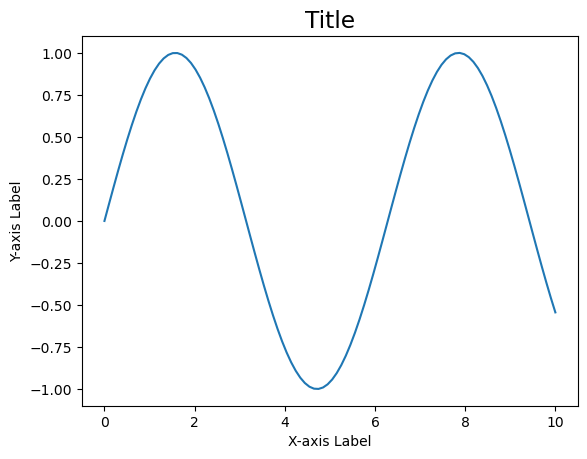

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#Test data
x = np.linspace(0, 10, 100)
y = np.sin(x)

#Test plotting
plt.plot(x, y)

#Test fonts
plt.rcParams.update({
    'font.size': 14,         
    'font.family': 'Arial',   
})

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title')
plt.show()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#Load data from excel file
data = pd.read_excel('GBM_mortalityregressiondata.xlsx')

#Seperate the data
#Extract the days to death
X = data.iloc[:, 1:]
y = data['days_to_death']

#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

coefficients = pd.DataFrame({'gene': X.columns, 'coefficient': regression_model.coef_})
coefficients_sorted = coefficients.sort_values(by='coefficient', ascending=False)
print("Top genes associated with higher mortality:")
print(coefficients_sorted.head(10))


R-squared: -178.8015813050223
Top genes associated with higher mortality:
      gene  coefficient
98   KLRK1  3945.140638
100   TFEC  1708.080601
63   KCNC1  1405.910719
19    CDC6  1222.930294
79   AIMP1   859.532143
62    GAD2   747.890909
17    SMC4   712.103589
3     IL4R   636.018874
24    SMC3   519.785488
82   MCPH1   443.036317


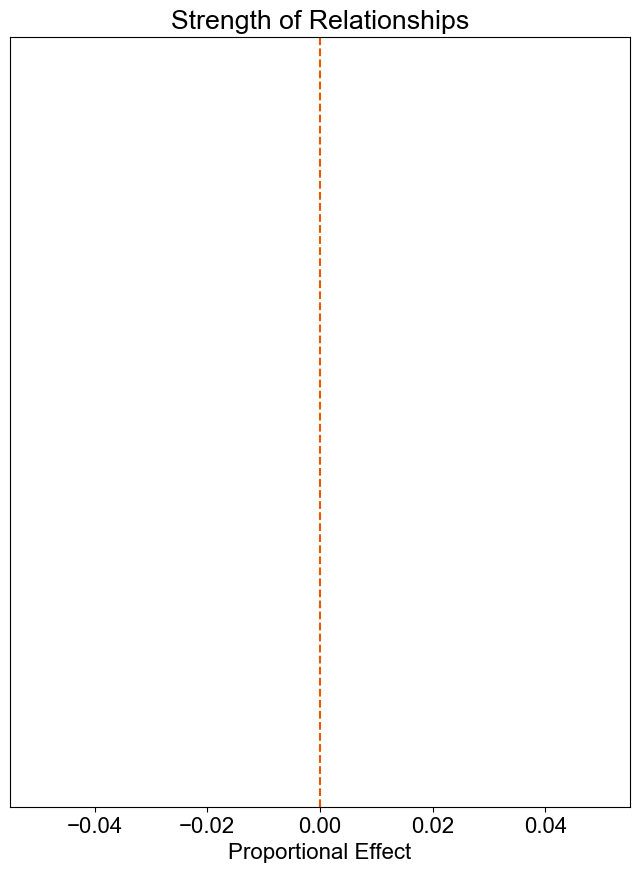

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Fit OLS regression model
res_norm = sm.OLS(y, sm.add_constant(X_scaled_df)).fit()

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 16


num_tests = len(res_norm.pvalues)
#Apply Bonferroni Correction for 104 features (multiple hypotheses)
corrected_pvalues = res_norm.pvalues * 104

significant_genes = res_norm.params[corrected_pvalues < 0.05][1:].sort_values()
significant_pvalues = corrected_pvalues[corrected_pvalues < 0.05][1:].sort_values()

#Plot coefficients
fig, ax = plt.subplots(figsize=(8, 10))
ax.scatter(significant_genes, range(len(significant_genes)), color="#1a9988", zorder=2)

#Annotate gene labels with p-values
for idx, (gene, pvalue) in enumerate(zip(significant_genes.index, significant_pvalues)):
    ax.text(significant_genes[gene], idx, f"{gene}\n(p={pvalue:.4f})", ha='right', va='center', color='black')

ax.set_xlabel("Proportional Effect") 
ax.set_yticks(range(len(significant_genes)))
ax.set_yticklabels(significant_genes.index)

ax.set_title("Strength of Relationships")

#Plot confidence intervals
for idx, ci in enumerate(res_norm.conf_int().loc[significant_genes.index].iterrows()):
    ax.hlines(idx, ci[1][0], ci[1][1], color="#eb5600", zorder=1, linewidth=3)

plt.axvline(0, color="#eb5600", linestyle="--") 

plt.show()



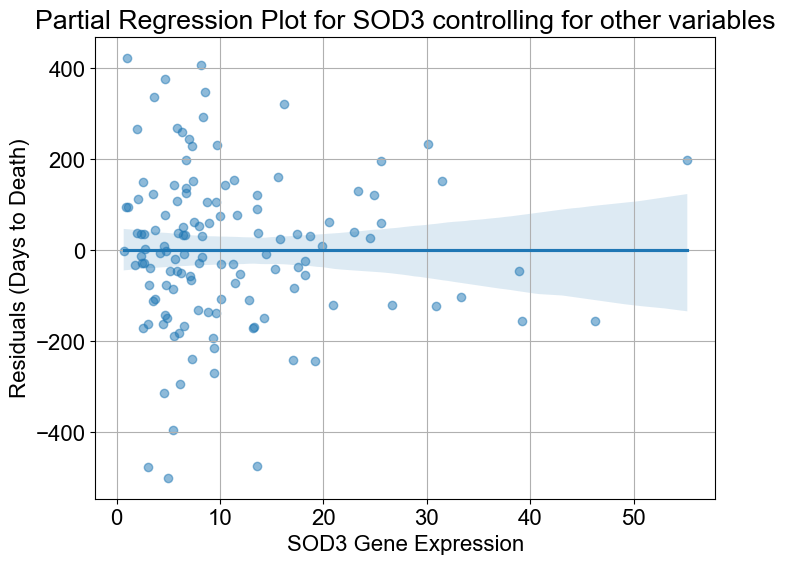

R-squared: 0.8180755615370394


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pd.read_excel("GBM_mortalityregressiondata.xlsx")

#Extract predictor variables (excluding 'SOD3')
X = data.drop(columns=['IL4R', 'days_to_death'])
y = data['days_to_death']

#Fit multivariate linear regression model
model = LinearRegression()
model.fit(X, y)

#Target predictor variable is days-to-death
y_pred = model.predict(X)

#Calculate residuals
residuals = y - y_pred

#Plot partial regression plot for 'SOD3'
plt.figure(figsize=(8, 6))
sns.regplot(x=data['SOD3'], y=residuals, scatter_kws={'alpha': 0.5})
plt.xlabel('SOD3 Gene Expression')
plt.ylabel('Residuals (Days to Death)')
plt.title('Partial Regression Plot for SOD3 controlling for other variables')
plt.grid(True)
plt.show()

#REDUNDANT calculate Rsquared
r_squared = r2_score(y, y_pred)

print("R-squared:", r_squared)

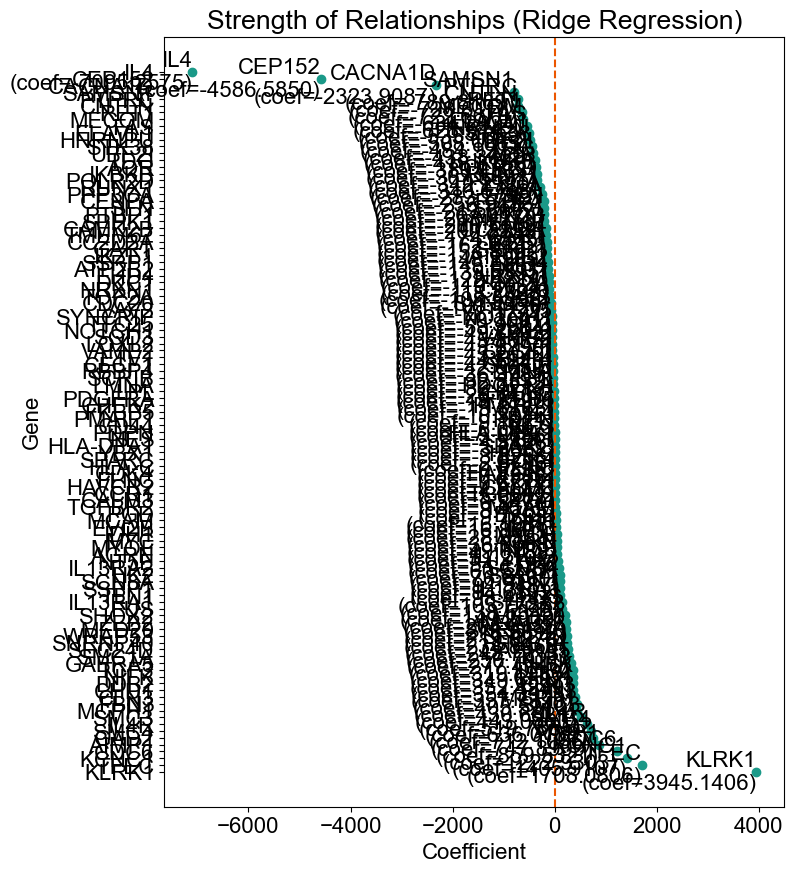

In [8]:
import matplotlib.pyplot as plt

#Ridge regression
plt.figure(figsize=(8, 10))
plt.scatter(coefficients_sorted['coefficient'], coefficients_sorted['gene'], color="#1a9988", zorder=2)

#Annotate gene labels with coefficients
for idx, (gene, coef) in enumerate(zip(coefficients_sorted['gene'], coefficients_sorted['coefficient'])):
    plt.text(coef, gene, f"{gene}\n(coef={coef:.4f})", ha='right', va='center', color='black')

plt.xlabel("Coefficient") 
plt.ylabel("Gene") 
plt.title("Strength of Relationships (Ridge Regression)")

plt.axvline(0, color="#eb5600", linestyle="--")  # Add vertical line at 0

plt.show()


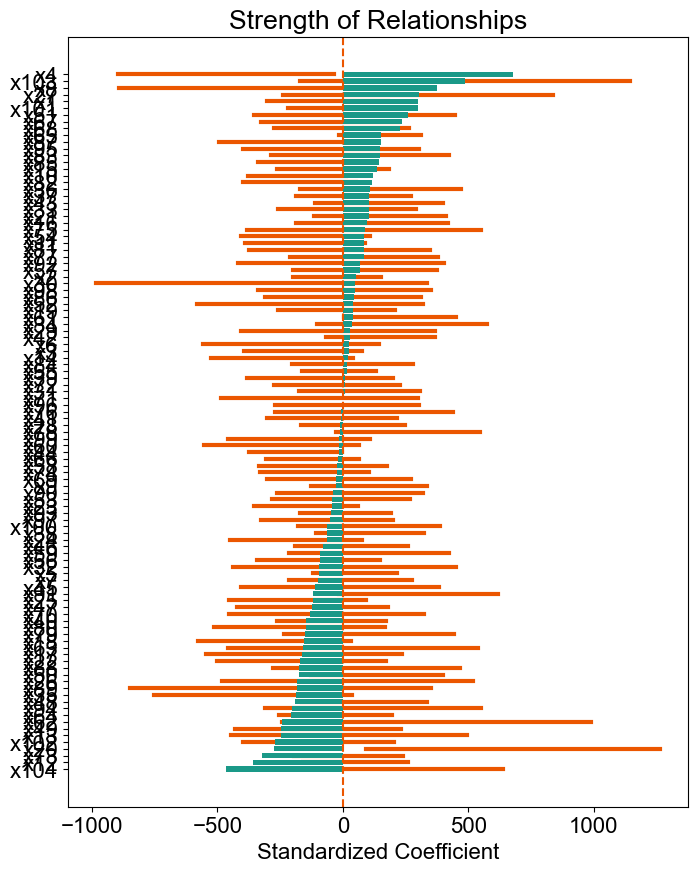

In [9]:

#Plot strength of relationships following ridge regression
res_norm = sm.OLS(y, sm.add_constant(X_scaled)).fit()

#Extract all coefficients
to_include = res_norm.params[1:].sort_values()

fig, ax = plt.subplots(figsize=(8, 10))
ax.barh(range(len(to_include)), to_include, color="#1a9988", zorder=2)
ax.set_yticks(range(len(to_include)))
ax.set_yticklabels(to_include.index) 
ax.set_xlabel("Standardized Coefficient") 
ax.set_title("Strength of Relationships") 

for idx, ci in enumerate(res_norm.conf_int().iloc[1:].iterrows()):
    ax.plot(ci[1], (idx, idx), color="#eb5600", zorder=1, linewidth=3)

plt.axvline(0, color="#eb5600", linestyle="--") 

plt.show()

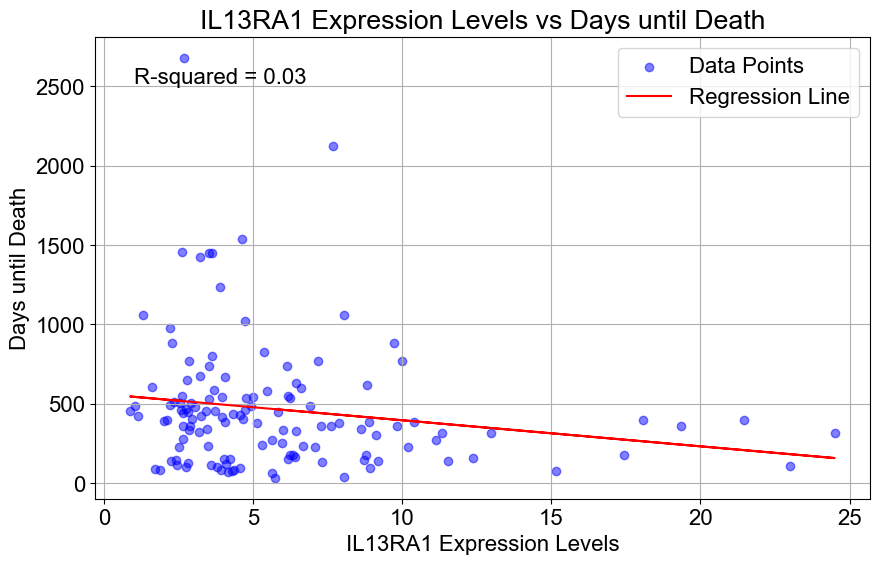

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
data = pd.read_excel('GBM_mortalityregressiondata.xlsx')

#Extract IL4R
IL4R_expression = data['IL4R']
days_until_death = data['days_to_death']

#Lin reg
regression_model = LinearRegression()
regression_model.fit(IL4R_expression.values.reshape(-1, 1), days_until_death)
predicted_days_until_death = regression_model.predict(IL4R_expression.values.reshape(-1, 1))

r_squared = r2_score(days_until_death, predicted_days_until_death)
plt.figure(figsize=(10, 6))
plt.scatter(IL4R_expression, days_until_death, color='blue', alpha=0.5, label='Data Points')
plt.plot(IL4R_expression, predicted_days_until_death, color='red', label='Regression Line')
plt.title('IL13RA1 Expression Levels vs Days until Death')
plt.xlabel('IL13RA1 Expression Levels')
plt.ylabel('Days until Death')
plt.grid(True)
plt.legend()
plt.text(0.05, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes)
plt.show()


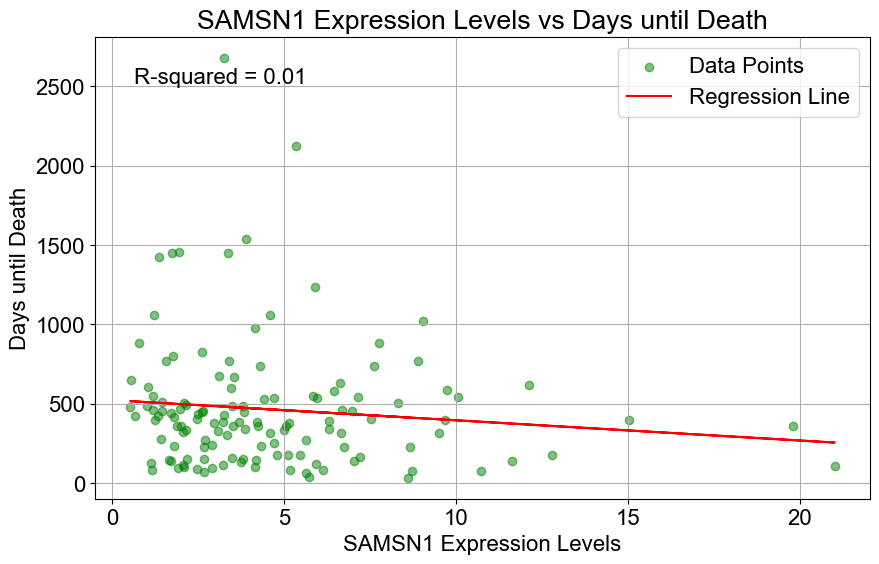

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pd.read_excel('GBM_mortalityregressiondata.xlsx')

SAMSN1_expression = data['SAMSN1']
days_until_death = data['days_to_death']

#Linreg
regression_model = LinearRegression()
regression_model.fit(SAMSN1_expression.values.reshape(-1, 1), days_until_death)
predicted_days_until_death = regression_model.predict(SAMSN1_expression.values.reshape(-1, 1))
r_squared = r2_score(days_until_death, predicted_days_until_death)

plt.figure(figsize=(10, 6))
plt.scatter(SAMSN1_expression, days_until_death, color='green', alpha=0.5, label='Data Points')
plt.plot(SAMSN1_expression, predicted_days_until_death, color='red', label='Regression Line')
plt.title('SAMSN1 Expression Levels vs Days until Death')
plt.xlabel('SAMSN1 Expression Levels')
plt.ylabel('Days until Death')
plt.grid(True)
plt.legend()
plt.text(0.05, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes)
plt.show()


In [12]:
#LASSO Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

#Load data
data = pd.read_excel('GBM_mortalitynewdata.xlsx')

#Ind/Dep variable (days_to_death)
X = data.iloc[:, 1:]
y = data['days_to_death'] 

#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#LASSO
lasso = Lasso(alpha=0.1, max_iter=100000) 
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
coefficients = pd.DataFrame({'Gene': X_scaled_df.columns, 'Coefficient': lasso.coef_})
print("Coefficients:")
print(coefficients)


Mean Squared Error: 263547.2598754254
Coefficients:
       Gene  Coefficient
0   IL13RA1    46.477225
1   IL13RA2   -27.816725
2       IL4    50.446537
3      IL4R   -86.414617
4      FMOD   -56.791128
5      CCL2   -86.566240
6       OSM   -74.213181
7    CXCL13   -42.167550
8      MNDA   -70.398432
9   HLA-DRA    52.140743
10     TLR8   -73.291329
11     LY75    -2.979245
12     IL15   -24.981249
13     IL18   -77.368644
14     CCR5    34.723902
15   ITGBL1    71.376078
16    TREM2   118.123531
17     SRGN    45.023789
18     GJB6   -17.848986
19    MMRN1   -54.884451
20  PLA2G4A    16.041207
21    IL17B   -52.838587
22     TLR6    77.367185
23     TLR5   105.184759


In [37]:
#Filter significant genes (non-zero coefficients)
significant_genes = coefficients[coefficients['Coefficient'] != 0]

#Print significant genes
print("Significant Genes:")
print(significant_genes)

Significant Genes:
       Gene  Coefficient
0   IL13RA1    46.477225
1   IL13RA2   -27.816725
2       IL4    50.446537
3      IL4R   -86.414617
4      FMOD   -56.791128
5      CCL2   -86.566240
6       OSM   -74.213181
7    CXCL13   -42.167550
8      MNDA   -70.398432
9   HLA-DRA    52.140743
10     TLR8   -73.291329
11     LY75    -2.979245
12     IL15   -24.981249
13     IL18   -77.368644
14     CCR5    34.723902
15   ITGBL1    71.376078
16    TREM2   118.123531
17     SRGN    45.023789
18     GJB6   -17.848986
19    MMRN1   -54.884451
20  PLA2G4A    16.041207
21    IL17B   -52.838587
22     TLR6    77.367185
23     TLR5   105.184759


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#Load new mortality data from Excel
data = pd.read_excel('GBM_mortalitynewdata.xlsx')

#Ind/Dep variable (days to death)
X = data.iloc[:, 1:] 
y = data['days_to_death']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Test ridge regression
ridge = Ridge(alpha=5.0)  
ridge.fit(X_train, y_train)

coefficients = pd.DataFrame({'Gene': X.columns, 'Coefficient': ridge.coef_})

#Filter significant genes (non-zero coefficients)
significant_genes = coefficients[coefficients['Coefficient'] != 0]

#Print significant genes
print("Significant Genes:")
print(significant_genes)

Significant Genes:
       Gene  Coefficient
0   IL13RA1     3.610509
1   IL13RA2    -1.867643
2       IL4    60.831389
3      IL4R   -20.623741
4      FMOD    -0.360389
5      CCL2    -1.104566
6       OSM   -12.226255
7    CXCL13    -1.373525
8      MNDA    -3.790418
9   HLA-DRA     0.066373
10     TLR8   -19.401599
11     LY75   -14.014858
12     IL15   -17.426303
13     IL18   -11.077981
14     CCR5     7.900635
15   ITGBL1    78.017916
16    TREM2     1.427697
17     SRGN     0.089241
18     GJB6   -13.464374
19    MMRN1   -37.250410
20  PLA2G4A     2.195104
21    IL17B   -72.179214
22     TLR6    69.295872
23     TLR5    72.119958


In [11]:
ridge = Ridge(alpha=1.0) 
ridge.fit(X_scaled_df, y)

coefficients = ridge.coef_

gene_names = X_scaled_df.columns

coefficients_df = pd.DataFrame({'Gene': gene_names, 'Coefficient': coefficients})

p_values = np.abs(coefficients)

threshold =100
significant_genes = coefficients_df[np.abs(coefficients_df['Coefficient']) > threshold].sort_values(by='Coefficient')

fig, ax = plt.subplots(figsize=(8, 10))
ax.scatter(significant_genes['Coefficient'], range(len(significant_genes)), color="#1a9988", zorder=2)

for idx, (gene, coef, p_value) in enumerate(zip(significant_genes['Gene'], significant_genes['Coefficient'], p_values)):
    ax.text(coef, idx, f"{gene}\n(coef={coef:.4f}, p={p_value:.4f})", ha='right', va='center', color='black')

ax.set_xlabel("Coefficient") 
ax.set_yticks(range(len(significant_genes)))
ax.set_yticklabels(significant_genes['Gene'])

ax.set_title("Strength of Relationships")

plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [130, 136]

         importance
SOD3       0.115210
TDG        0.081374
NES        0.037407
FKBP5      0.037357
CLN3       0.033888
SSBP1      0.030768
CDC6       0.030668
LMNA       0.030342
TCF3       0.030186
TTC25      0.026414
CHD1       0.021052
SNRNP40    0.020947
POLR2D     0.017236
TLN1       0.015826
DDB2       0.013568
IKBKB      0.013399
MYOF       0.013267
CNTLN      0.013176
NIFK       0.011704
HLA-C      0.011206
IL13RA1    0.010914
TMEM67     0.010660
FLNC       0.010511
NT5E       0.009820
LPL        0.009397
YBX1       0.009197
PPP3CA     0.009184
RBBP4      0.009051
RFT1       0.008913
CD44       0.008701
SMC3       0.008437
MED20      0.008346
SCRIB      0.008114
UBE2I      0.008089
MYC        0.007999
CALM3      0.007660
ATP2B2     0.007468
MECOM      0.006825
HK2        0.006655
SFN        0.006201
AGRN       0.006102
SHOX2      0.006096
GART       0.006060
SPHK1      0.005942
FUS        0.005879
DKC1       0.005810
SEC24D     0.005724
TFEC       0.005520
FBN3       0.005372


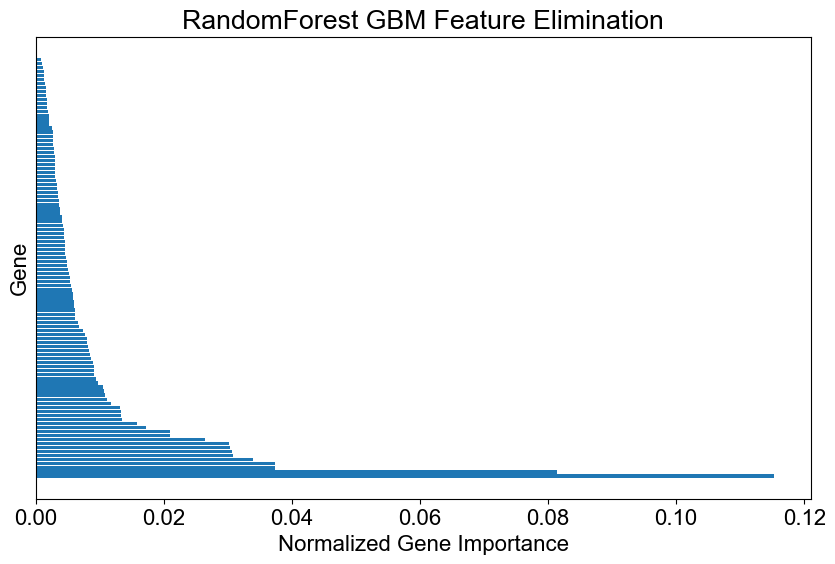

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#RFE with default mortality regression dataset
data = pd.read_excel("GBM_mortalityregressiondata.xlsx")

#Separate gene features and target mortality predictor
X = data.drop(columns=['days_to_death'])
y = data['days_to_death']
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame(rf.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head(50))

#Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Normalized Gene Importance')
plt.ylabel('Gene')
plt.title('RandomForest GBM Feature Elimination')

plt.yticks([])

plt.show()

          importance
SOD3        0.187476
TCF3        0.108304
AQR         0.088632
UBE2I       0.066920
TTC25       0.064198
TLN1        0.051615
YBX1        0.047714
CC2D2A      0.032932
CLN3        0.030979
CDC6        0.029212
PDPN        0.017592
NRXN1       0.017295
LOXL2       0.017025
SMC1A       0.016667
SEC24D      0.015803
MED20       0.014987
TOP2A       0.014786
GART        0.013881
PGD         0.013786
SSBP1       0.013106
IL4R        0.011930
TDG         0.011193
AIMP1       0.009686
PDGFRA      0.008243
SNRNP40     0.007014
NIFK        0.006722
IL4         0.006609
CNTLN       0.006141
MYOF        0.006043
TMEM67      0.005721
HLA-C       0.004532
PTPRC       0.004427
NT5E        0.004238
MYC         0.003873
SPHK1       0.003099
CHEK2       0.002888
HLA-DPA1    0.002565
SMC3        0.002387
SPARC       0.002248
VAMP2       0.001932
ATP2B2      0.001837
IL13RA1     0.001805
SMC4        0.001780
GABRA5      0.001697
NOTCH1      0.001434
TGFBR2      0.001398
FLNC        0

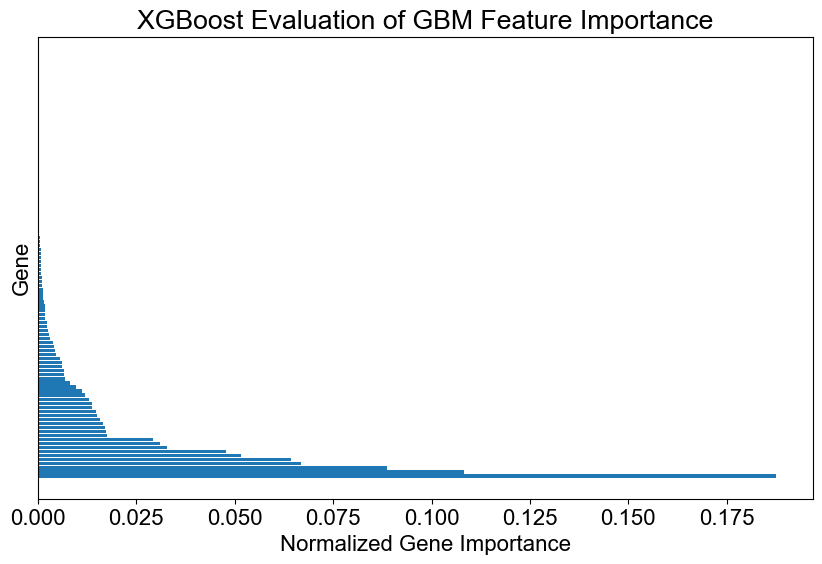

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_excel("GBM_mortalityregressiondata.xlsx")

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 16

X = data.drop(columns=['days_to_death'])
y = data['days_to_death']
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Train XGBoost regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train, y_train)

feature_importances = pd.DataFrame(xgb.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head(50))

#Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Normalized Gene Importance')
plt.ylabel('Gene')
plt.title('XGBoost Evaluation of GBM Feature Importance')
plt.yticks([])

plt.show()

In [88]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

#Rerun model to plot coefficients of each predictor variable
data = pd.read_excel("GBM_mortalitynewdata.xlsx")

X = data.iloc[:, 1:] 
y = data.iloc[:, 0]  

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          days_to_death   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.9253
Date:                Tue, 23 Apr 2024   Prob (F-statistic):              0.568
Time:                        17:23:57   Log-Likelihood:                -996.08
No. Observations:                 136   AIC:                             2042.
Df Residuals:                     111   BIC:                             2115.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.6010    133.081      3.514      0.0